In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telecom2/telecom_users.csv


# Data Load: Load telecom data into a dataframe

In [2]:
df = pd.read_csv("../input/telecom2/telecom_users.csv") # load data into a data frame

# Preview the data

In [3]:
num_examples, num_features = df.shape
print('number of features:', num_features)
print('number of examples:', num_examples)
print('')
df.head() # Display the FIRST 5 Observations

number of features: 24
number of examples: 6050



,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Provider,Age
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,NaN,NaN
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No,NaN,NaN
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,NaN,NaN
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No,NaN,NaN
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,No,Electronic check,53.45,119.5,No,NaN,NaN


# Drop features that are not required the analysis


In [4]:
df1 = df.drop(['Provider','Age'],axis='columns')
df.shape

(6050, 24)

# Statistics on our Numerical Variables

In [5]:
df1.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,6050.000000,6050.000000,6050.000000,6050.000000
mean,3534.521653,0.162149,32.479174,64.836719
std,2035.721126,0.368618,24.517192,30.099479
min,0.000000,0.000000,0.000000,18.250000
25%,1778.250000,0.000000,9.000000,35.750000
50%,3545.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


# Exploratory Data Analysis

In [6]:
#Total Subscribers (which are not Senior Citizens) with the following:
    #a. Phone Service
    #b. Internet Service
    #c. Device Protection
    #d. Streaming TV
    #e. Paperless billing

telcom_subcribers_not_seniors = df1[df1['SeniorCitizen'] == 0].groupby(['gender','PhoneService', 'InternetService', 'DeviceProtection', 'StreamingTV', 'PaperlessBilling']).size().reset_index(name='count')
telcom_subcribers_not_seniors

,gender,PhoneService,InternetService,DeviceProtection,StreamingTV,PaperlessBilling,count
0,Female,No,DSL,No,No,No,57
1,Female,No,DSL,No,No,Yes,48
2,Female,No,DSL,No,Yes,No,16
3,Female,No,DSL,No,Yes,Yes,26
4,Female,No,DSL,Yes,No,No,26
5,Female,No,DSL,Yes,No,Yes,20
6,Female,No,DSL,Yes,Yes,No,24
7,Female,No,DSL,Yes,Yes,Yes,37
8,Female,Yes,DSL,No,No,No,133
9,Female,Yes,DSL,No,No,Yes,145


# Male Subscribers Not Seniors Citizens

In [7]:
#Total Male Subscribers (which are not Senior Citizens) with the following:
    #a. Phone Service
    #b. Internet Service
    #c. Device Protection
    #d. Streaming TV
    #e. Paperless billing

telcom_male_subcribers_not_seniors = telcom_subcribers_not_seniors[telcom_subcribers_not_seniors['gender'] == 'Male'].groupby(['gender','PhoneService', 'InternetService', 'DeviceProtection', 'StreamingTV', 'PaperlessBilling']).sum().reset_index()


telcom_male_subcribers_not_seniors

,gender,PhoneService,InternetService,DeviceProtection,StreamingTV,PaperlessBilling,count
0,Male,No,DSL,No,No,No,42
1,Male,No,DSL,No,No,Yes,54
2,Male,No,DSL,No,Yes,No,12
3,Male,No,DSL,No,Yes,Yes,27
4,Male,No,DSL,Yes,No,No,32
5,Male,No,DSL,Yes,No,Yes,23
6,Male,No,DSL,Yes,Yes,No,31
7,Male,No,DSL,Yes,Yes,Yes,34
8,Male,Yes,DSL,No,No,No,136
9,Male,Yes,DSL,No,No,Yes,161


# Female Subscribers Not Seniors Citizens

In [19]:
#Total Female Subscribers (which are not Senior Citizens) with the following:
    #a. Phone Service
    #b. Internet Service
    #c. Device Protection
    #d. Streaming TV
    #e. Paperless billing

telcom_female_subcribers_not_seniors = telcom_subcribers_not_seniors[telcom_subcribers_not_seniors['gender'] == 'Female'].groupby(['gender','PhoneService', 'InternetService', 'DeviceProtection', 'StreamingTV', 'PaperlessBilling']).sum().reset_index()

telcom_female_subcribers_not_seniors

,gender,PhoneService,InternetService,DeviceProtection,StreamingTV,PaperlessBilling,count
0,Female,No,DSL,No,No,No,57
1,Female,No,DSL,No,No,Yes,48
2,Female,No,DSL,No,Yes,No,16
3,Female,No,DSL,No,Yes,Yes,26
4,Female,No,DSL,Yes,No,No,26
5,Female,No,DSL,Yes,No,Yes,20
6,Female,No,DSL,Yes,Yes,No,24
7,Female,No,DSL,Yes,Yes,Yes,37
8,Female,Yes,DSL,No,No,No,133
9,Female,Yes,DSL,No,No,Yes,145


In [9]:
#EDA to predict churn rate base on the following variables:

    #tenure
    #Paperless Billing
    #contract
    #Monthly Charges
    #Total Charges

# Tenure vs. Churn

In [10]:
subcribers_not_seniors = df1[df1['SeniorCitizen'] == 0].groupby(['gender','tenure','PhoneService', 'Contract','InternetService', 'DeviceProtection', 'StreamingTV', 'PaperlessBilling', 'MonthlyCharges','TotalCharges', 'Churn']).size().reset_index()

subcribers_not_seniors

,gender,tenure,PhoneService,Contract,InternetService,DeviceProtection,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,0
0,Female,0,No,Two year,DSL,Yes,Yes,No,56.05,,No,1
1,Female,0,No,Two year,DSL,Yes,Yes,Yes,52.55,,No,1
2,Female,0,Yes,Two year,DSL,Yes,Yes,No,80.85,,No,1
3,Female,0,Yes,Two year,No,No internet service,No internet service,No,20.00,,No,1
4,Female,1,No,Month-to-month,DSL,No,No,No,24.40,24.4,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,72,Yes,Two year,No,No internet service,No internet service,Yes,19.80,1468.75,No,1
4977,Male,72,Yes,Two year,No,No internet service,No internet service,Yes,20.80,1521.2,No,1
4978,Male,72,Yes,Two year,No,No internet service,No internet service,Yes,23.55,1723.95,No,1
4979,Male,72,Yes,Two year,No,No internet service,No internet service,Yes,25.10,1790.8,No,1


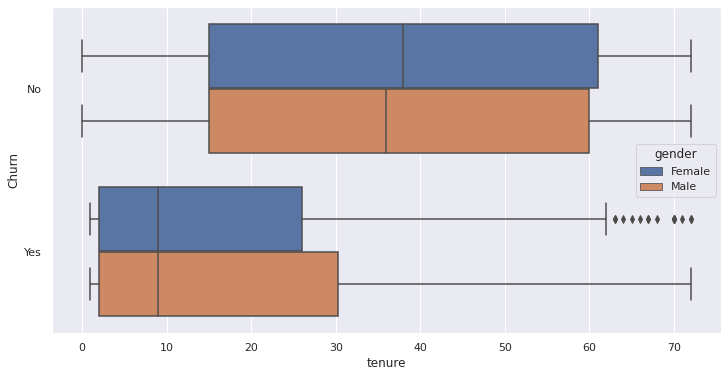

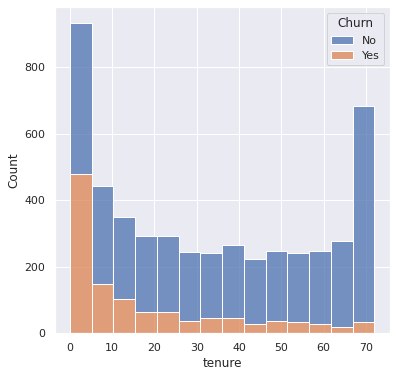

In [11]:
# Tenure vs. Churn for those not seniors only 
sns.set(rc={'figure.figsize':(12,6)})

sns.boxplot(data=subcribers_not_seniors, x="tenure", y="Churn", hue ='gender')
plt.show()

sns.set(rc={'figure.figsize':(6,6)})


sns.histplot(data = subcribers_not_seniors,x= "tenure", hue = 'Churn',multiple='stack')
plt.show()

# Paperless Billing vs. Churn

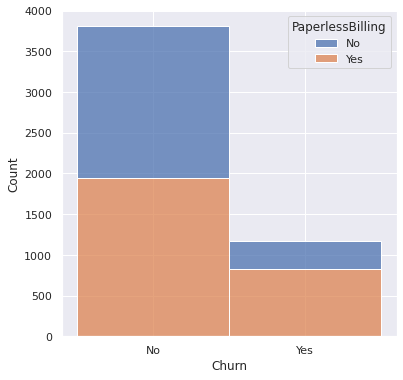

In [12]:
sns.set(rc={'figure.figsize':(6,6)})
sns.histplot(data = subcribers_not_seniors,x= "Churn",hue = 'PaperlessBilling',multiple='stack')
plt.show()

In [13]:
print(subcribers_not_seniors[subcribers_not_seniors['Churn'] == "Yes"].shape)
print(subcribers_not_seniors[subcribers_not_seniors['Churn'] == "No"].shape)

(1167, 12)
(3814, 12)


# Contract vs. Churn

<AxesSubplot:xlabel='Churn', ylabel='Count'>

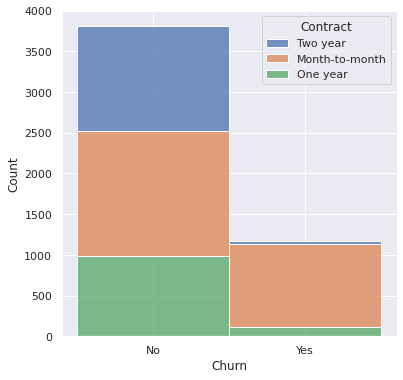

In [14]:
sns.histplot(data = subcribers_not_seniors,x= "Churn",hue = 'Contract',multiple='stack')

# Monthly Charges vs. Churn

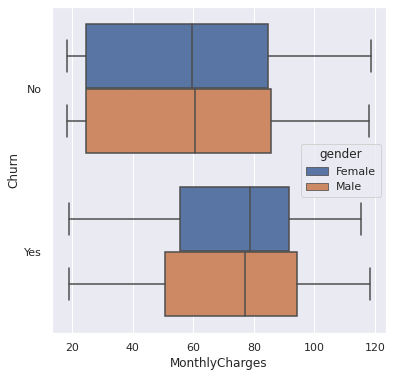

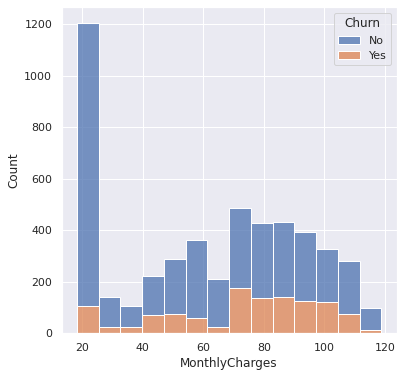

In [15]:
sns.boxplot(data=subcribers_not_seniors, x="MonthlyCharges", y="Churn", hue = "gender")
plt.show()
sns.histplot(data = subcribers_not_seniors,x= "MonthlyCharges",hue = 'Churn',multiple='stack')
plt.show()

# Total Charges vs. Churn

In [16]:
subcribers_not_seniors['TotalCharges'].replace(" ", '0', inplace=True)
subcribers_not_seniors.TotalCharges.astype("float64")
subcribers_not_seniors['TotalCharges'] = subcribers_not_seniors['TotalCharges'].astype(float)

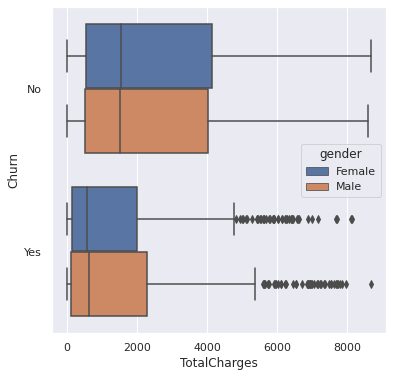

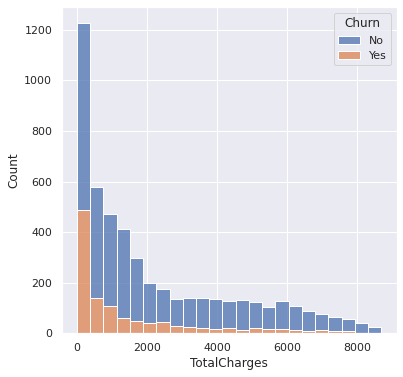

In [17]:
sns.boxplot(data=subcribers_not_seniors, x="TotalCharges", y="Churn", hue = 'gender')
plt.show()
sns.histplot(data = subcribers_not_seniors,x= "TotalCharges",hue = 'Churn',multiple='stack')
plt.show()